In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import layers

In [29]:
#Khai báo tập dữ liệu fashion_nmist đã chia sẵn train và test
#xtrain là các hình ảnh của tập train, y train là các label mô tả của tập train
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

In [30]:
type(xtrain), type(ytrain)

(numpy.ndarray, numpy.ndarray)

In [31]:
xtrain.shape
#Có 60k ảnh 3 chiều 28*28

(60000, 28, 28)

In [32]:
xtrain.dtype, ytrain.dtype

(dtype('uint8'), dtype('uint8'))

In [33]:
class_name = ['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','Ankle_boot']

In [34]:
xtrain[0]
ytrain[0]
#ytrain[0] ra 9 do tên của nó nằm trong 1 bảng lưu trữ tên quần áo 9 là chỉ kiểu quần áo Ankle_boot

9

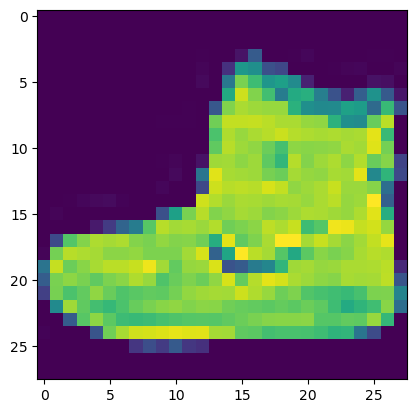

In [35]:
plt.imshow(xtrain[0])# Quy hình ảnh về ma trận số để cho mô hình học hiện hình ảnh nhị phân ở dạng ảnh

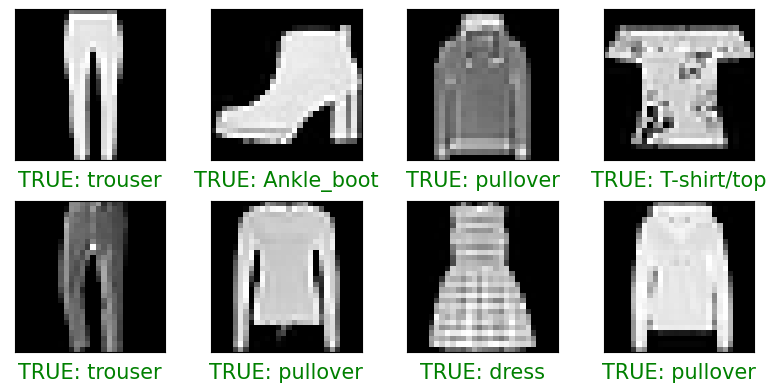

In [36]:
#Hàm để plot data và label lên để dễ nhận diện
from typing import Optional#OPTIONAL đại biểu cho việc giá trị đó có cũng đc 0 cũng đc
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba:Optional[np.ndarray]=None)->None:#Bắt buộc x_data y_data và y_data phải có kiểu np.array
    nrows, ncols = 2,4#Vẽ ảnh trên 2 dòng mỗi dòng 4 ảnh
    fig, axes=plt.subplots(nrows, ncols, figsize=(8,4))#Ngang 8 cao 4
    len_x=x_data.shape[0]#Truyền vào xtrain thì shape =(60000,28,28) shape[0]=60k
   
    for i in range(nrows*ncols):
        ax = axes[i//ncols,i%ncols] # Lấy ra từng axes 1 
        img_idx=random.randint(0,len_x)#Chọn ngẫu nhiên 1 vài ảnh từ 0 đến 60k để xem thử datasets của mình ntn?
        ax.imshow(x_data[img_idx],cmap='gray')
        ax.set(xticks=[],yticks=[])#Loại bỏ số của đồ thị 0 1 2 3 4 gi gì đó
        color='green'
        true_label_str=f"TRUE: {class_name[y_data[img_idx]]}"

        if y_proba is not None:
            pre_idx = np.argmax(y_proba[img_idx])
            pre_label= class_name[pre_idx]
            color ='red' if pre_idx != y_data[img_idx] else color
            pre_label_str = f'\nPredict: {pre_label}'
        img_title=true_label_str if y_proba is None else true_label_str + pre_label_str
        
        # Label=class_name[y_data[img_idx]]
        ax.set_xlabel(img_title,color=color,fontsize=15)
    plt.tight_layout()
    plt.show()
plot_data(xtrain,ytrain)

        

In [37]:
#Convert Data về float32 và chạy từ 0-1 unit NORM... nhiều cách khác trong phân tích dữ liệu lớn cóa dạy cả
xtrain = xtrain.astype(np.float32)/255
xtest = xtest.astype(np.float32)/255


In [38]:
xtest.shape
#10k ảnh cao 28 rộng 28

(10000, 28, 28)

In [39]:
# 1 cấu trúc ảnh cơ bản cần có ảnh(tất cả các ảnh,cao, rộng,số channels(số color channels) )
#TRONG PYTORCH THÌ CHANNELS ĐỨNG ĐẦU TIÊN
#TENSORFLOW THÌ CHANNELS Ở CUỐI

In [40]:
#Ảnh của ta thiếu channels nên cần add thêm vào
#Mở rộng thêm 1 chiều nữa cho ảnh(60k,28,28)->(60k,28,28,1) 4d array
xtrain=np.expand_dims(xtrain, axis=-1)
xtrain.shape

(60000, 28, 28, 1)

In [41]:
xtest= np.expand_dims(xtest, axis=-1)
xtest.shape

(10000, 28, 28, 1)

In [42]:
#convert class vector binary class matrix 1=>(0 1 0 0...) Ý là 1
#sẽ chia làm 1 matran [1,10] nếu có 1 thì vị trí 1 = 1 còn lại 9 vị trí còn lại =0
#2=>(0 0 1 0 0...)
#10 chỉ là ví dụ mô phỏng thôi ý là 10 sẽ đc thay thế bằng len(class_name)
ytrain_label=keras.utils.to_categorical(ytrain,len(class_name))
ytest_label=keras.utils.to_categorical(ytest,len(class_name))
ytrain_label[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [43]:
#build mô hình máy học bằng keras
input_Shape = (28,28,1)

In [44]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_Shape),# Flatten chuyển input data thành 1 vector hay mảng 1 chiều
    #convert (28,28,1)=>(784) Mảng 1 chiều = 28*28
    #784 nốt mỗi nốt tương ứng với 1 pixel trên ảnh
    layers.Dense(512,activation='relu'),# từng node ở đây nhận tất cả input từ 784 nốt trc đó theo phương trình y = ax+b
    layers.Dense(256,activation='relu'),
    layers.Dense(len(class_name),activation='softmax')# video phút thứ 26:25 để hiểu softmax https://youtu.be/a4-hBti_sLo?si=qxpeSE5s0Tdggiin
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [46]:
# #Số lô =60000/500=120
# #Điều này có nghĩa là trong mỗi kỷ nguyên, sẽ có 120 lô được sử dụng để cập nhật các mô hình quan trọng.
# Tuy nhiên, bạn đã tìm thấy số 108 thay vì 120. Điều này có thể làm được:
# Phân tách xác thực : Bạn đã chỉ định validation_split=0.1, tức là 10% huấn luyện viên dữ liệu sẽ được sử dụng để xác thực dữ liệu (xác thực), giảm số lượng mẫu huấn luyện huấn luyện thực tế xuống.
# Số mẫu còn lại cho người huấn luyện:
# = 60000×( 1−0,1 )=54000
# Sau khi phân tách 10% dữ liệu làm dữ liệu xác thực, sẽ còn lại 54.000 huấn luyện viên dữ liệu mẫu. Khi sử dụng batch size là 500, số batch trong mỗi epoch sẽ được tính
# #Số lô =54000/500=108





In [47]:
history = model.fit(xtrain,ytrain_label,epochs=10,batch_size=500,validation_split=0.1,verbose=1)
#60k/128 ra khoảng 422

Epoch 1/10
108/108 [==============================] - 11s 45ms/step - loss: 0.7333 - accuracy: 0.7381 - val_loss: 0.4592 - val_accuracy: 0.8333
Epoch 2/10
108/108 [==============================] - 6s 58ms/step - loss: 0.4651 - accuracy: 0.8283 - val_loss: 0.4208 - val_accuracy: 0.8477
Epoch 3/10
108/108 [==============================] - 5s 45ms/step - loss: 0.3966 - accuracy: 0.8523 - val_loss: 0.3734 - val_accuracy: 0.8667
Epoch 4/10
108/108 [==============================] - 6s 54ms/step - loss: 0.3589 - accuracy: 0.8667 - val_loss: 0.3756 - val_accuracy: 0.8645
Epoch 5/10
108/108 [==============================] - 6s 54ms/step - loss: 0.3297 - accuracy: 0.8769 - val_loss: 0.3221 - val_accuracy: 0.8823
Epoch 6/10
108/108 [==============================] - 1886s 18s/step - loss: 0.3083 - accuracy: 0.8848 - val_loss: 0.3149 - val_accuracy: 0.8857
Epoch 7/10
108/108 [==============================] - 8s 78ms/step - loss: 0.2929 - accuracy: 0.8909 - val_loss: 0.3255 - val_accuracy: 0.8

In [48]:
history_dict= history.history

In [49]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
train_loss, val_loss = history_dict['loss'],history_dict['val_loss']
train_acc, val_acc= history_dict['accuracy'],history_dict['val_accuracy']

In [51]:
# Model Evaluation Thử trên tập test
score= model.evaluate(xtest,ytest_label)

313/313 [==============================] - 6s 16ms/step - loss: 0.3372 - accuracy: 0.8805


313/313 [==============================] - 3s 10ms/step


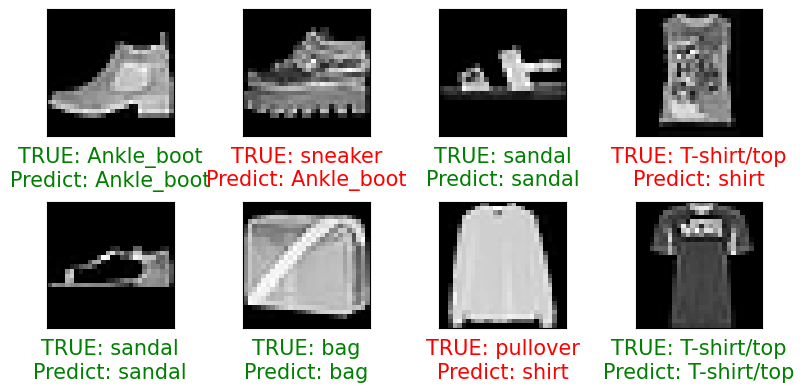

In [52]:
#Predict
x_sample= xtest[:3]
# y_sample_label_predictions= model.predict(x_sample)
y_sample_label_predictions= model.predict(xtest)
prediction = np.argmax(y_sample_label_predictions,axis=1)#Trả về y_sample_label_predictions lơns nhất 
# y_sample_label_predictions.round(3)
[class_name[i]for i in prediction]
plot_data(xtest,ytest,y_sample_label_predictions)